#                                                       Retail - PGP

#### DESCRIPTION

##### Problem Statement:

    * It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
    * Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
    * Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).
   
#### Dataset Description

    This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.
    
##### Variables	Description
| Variables | Description |
| :--- | :--- |
| InvoiceNo | Invoice number. <br/> _Nominal, a six digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation_ |
| StockCode | Product (item) code.  <br/> _Nominal, a five digit integral number uniquely assigned to each distinct product_ |
| Description | Product (item) name. <br/> _Nominal_ |
| Quantity | The quantities of each product (item) per transaction. <br/> _Numeric_ |
| InvoiceDate | Invoice Date and time. <br/> _Numeric, the day and time when each transaction was generated_ |
| UnitPrice | Unit price. <br/> _Numeric, product price per unit in sterling_ |
| CustomerID | Customer number. <br/> _Nominal, a six digit integral number uniquely assigned to each customer_ |
| Country | Country name. <br/> _Nominal, the name of the country where each customer resides_ |

<br/>

Download the **datasets** from _**[here](https://github.com/Simplilearn-Edu/Data-Science-Capstone-Projects "GitHub Repository")**_.

---

## Project Task: Week 1

**Data Cleaning:**

1. Perform a preliminary data inspection and data cleaning.

    a. Check for missing data and formulate an apt strategy to treat them.

    b. Remove duplicate data records.

    c. Perform descriptive analytics on the given data.


**Data Transformation:**

2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

    a. Create month cohorts and analyze active customers for each cohort.

    b. Analyze the retention rate of customers.


### Code :
**Data Cleaning:**

1. Perform a preliminary data inspection and data cleaning.

    a. Check for missing data and formulate an apt strategy to treat them.

    b. Remove duplicate data records.

    c. Perform descriptive analytics on the given data.


In [1]:
# Importing pandas, Numpy, matplotlib and seaborn libararies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the file Excel file from the pandas libaray 
dataset=pd.read_excel('Online Retail.xlsx')

In [3]:
#Top 5 dataset
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#The dataset is having the 541909 rows and 8 column 
dataset.shape

(541909, 8)

In [5]:
# Checking form the Null Value
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#Chicking for the null column of its Index 
dataset[dataset['CustomerID'].isnull()].index

Int64Index([   622,   1443,   1444,   1445,   1446,   1447,   1448,   1449,
              1450,   1451,
            ...
            541531, 541532, 541533, 541534, 541535, 541536, 541537, 541538,
            541539, 541540],
           dtype='int64', length=135080)

In [8]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# Checkinng for the duplicate value in the dataset
dataset.duplicated().sum()

5268

In [10]:
dataset[dataset['CustomerID'].isnull()].index

Int64Index([   622,   1443,   1444,   1445,   1446,   1447,   1448,   1449,
              1450,   1451,
            ...
            541531, 541532, 541533, 541534, 541535, 541536, 541537, 541538,
            541539, 541540],
           dtype='int64', length=135080)

In [11]:
dataset.shape

(541909, 8)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
dataset.loc[dataset.Quantity < 0].shape

(10624, 8)

In [16]:
dataset.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [18]:
Dataset_info=pd.DataFrame(dataset.dtypes)
Dataset_info['Null_values']=dataset.isnull().sum()
Dataset_info['Percentage']=dataset.isnull().sum()/len(dataset)
Dataset_info.rename(columns={0: 'Data Type', 'Null_values': '# of Null Values','Percentage': '%age of Null Values'},inplace=True)

print('Dimension of rawdata: ', dataset.shape)

print('\n \nData Type and Null population Information:')
display(Dataset_info)

Dimension of rawdata:  (541909, 8)

 
Data Type and Null population Information:


,Data Type,# of Null Values,%age of Null Values
InvoiceNo,object,0,0.000000
StockCode,object,0,0.000000
Description,object,1454,0.002683
Quantity,int64,0,0.000000
InvoiceDate,datetime64[ns],0,0.000000
UnitPrice,float64,0,0.000000
CustomerID,float64,135080,0.249267
Country,object,0,0.000000


In [19]:
#The total number of Customer , Products, Transcation
pd.DataFrame([{'products': len(dataset['StockCode'].value_counts()),    
               'transactions': len(dataset['InvoiceNo'].value_counts()),
               'customers': len(dataset['CustomerID'].value_counts()),  
              }], columns = ['customers', 'products', 'transactions'], index = ['quantity'])

,customers,products,transactions
quantity,4372,4070,25900


In [20]:
# Dropping Customer ID - since this is the only unique value to identify our customers
dataset.dropna(subset=['CustomerID'],inplace=True)
print('\nDimension of data now: ', dataset.shape)


Dimension of data now:  (406829, 8)


In [21]:
Dataset_info=pd.DataFrame(dataset.dtypes)
Dataset_info['Null_values']=dataset.isnull().sum()
Dataset_info['Percentage']=dataset.isnull().sum()/len(dataset)
Dataset_info.rename(columns={0: 'Data Type', 'Null_values': '# of Null Values','Percentage': '%age of Null Values'},inplace=True)

print('Dimension of data now: ', dataset.shape)
print('\n \nData Type and Null population Information:')
display(Dataset_info)

Dimension of data now:  (406829, 8)

 
Data Type and Null population Information:


,Data Type,# of Null Values,%age of Null Values
InvoiceNo,object,0,0.0
StockCode,object,0,0.0
Description,object,0,0.0
Quantity,int64,0,0.0
InvoiceDate,datetime64[ns],0,0.0
UnitPrice,float64,0,0.0
CustomerID,float64,0,0.0
Country,object,0,0.0



### Code :
**Data Transformation:**

2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

    a. Create month cohorts and analyze active customers for each cohort.

    b. Analyze the retention rate of customers.

In [22]:
# We have 10624 records where transaction had quantity less than zero
dataset.loc[dataset["Quantity"] < 0].shape

(8905, 8)

In [23]:
# We have 2517 transaction where Unit Price were recorded as zero
dataset.loc[dataset["UnitPrice"] < 0.00001].shape

(40, 8)

In [24]:
# There 0 duplicate records in the transaction
dataset.drop_duplicates().shape,dataset.shape

((401604, 8), (406829, 8))

In [25]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [26]:
dataset.loc[dataset["InvoiceNo"].str.contains("C") == True,"Cancel"] = "Y"

In [27]:
dataset.loc[dataset["InvoiceNo"].str.contains("C") != True,"Cancel"] = "N"

In [28]:
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,N
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,N
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,N
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,N
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,N
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,N
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,N
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,N
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,N
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,N


In [29]:
# 37 unique country
dataset.Country.nunique()

37

In [30]:
# Count of transaction where Unit Price = zero
dataset.loc[dataset["UnitPrice"] < 0.00001].shape

(40, 9)

In [31]:
# Calculating amount 
dataset["Amount"] = dataset["Quantity"] * dataset["UnitPrice"]

In [32]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,N,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,N,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,N,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,N,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,N,20.34


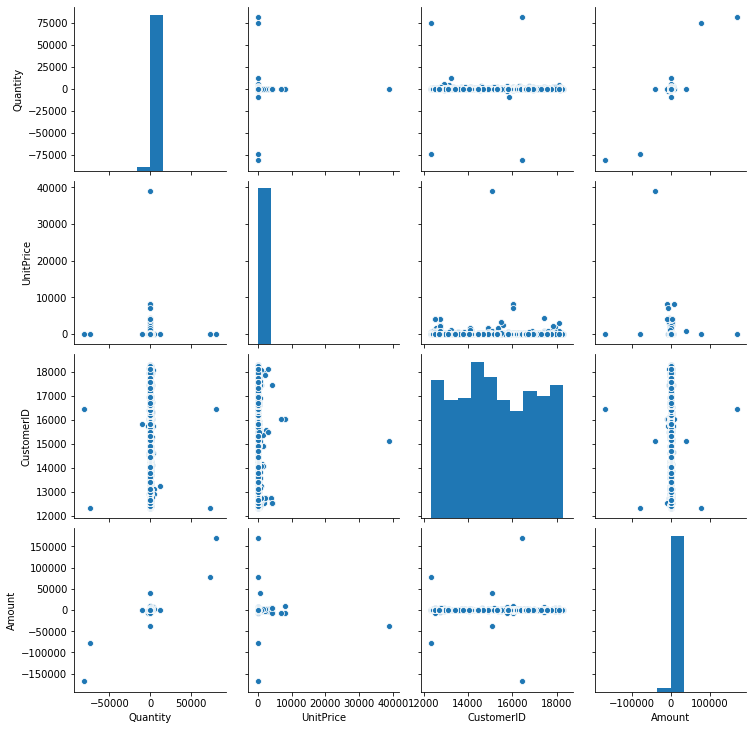

In [33]:
# Exploring the distribution of whole dataset
sns.pairplot(dataset)

In [34]:
grouped  = dataset.groupby(["Country"]).sum()
grouped.head()

,Quantity,UnitPrice,CustomerID,Amount
Country,,,,
Australia,83653,4054.75,15693002.0,137077.27
Austria,4827,1701.52,5021102.0,10154.32
Bahrain,260,78.95,210027.0,548.40
Belgium,23152,7540.13,25718288.0,40910.96
Brazil,356,142.60,408608.0,1143.60


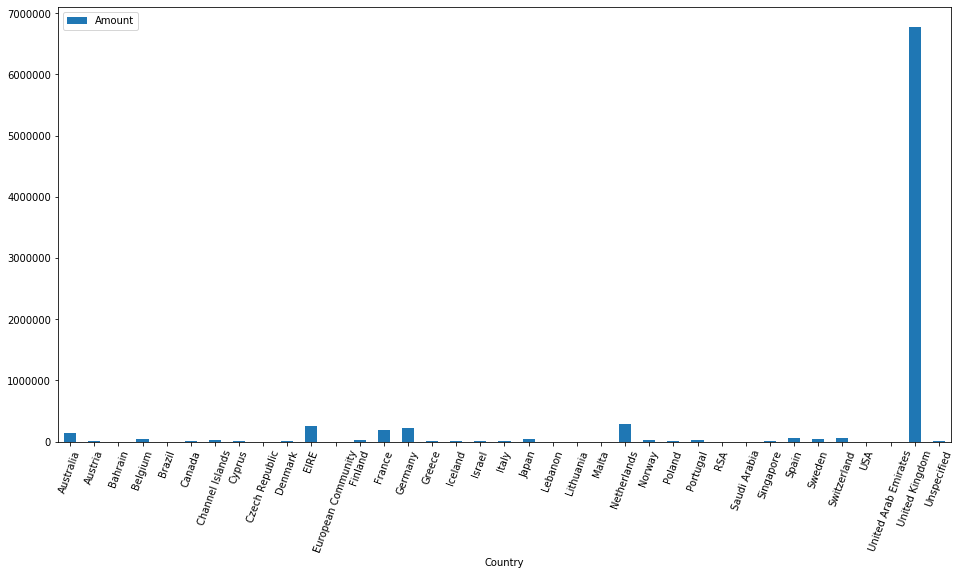

In [35]:
grouped[["Amount"]].plot(kind="bar",figsize=(16,8),rot = 70)
plt.show()

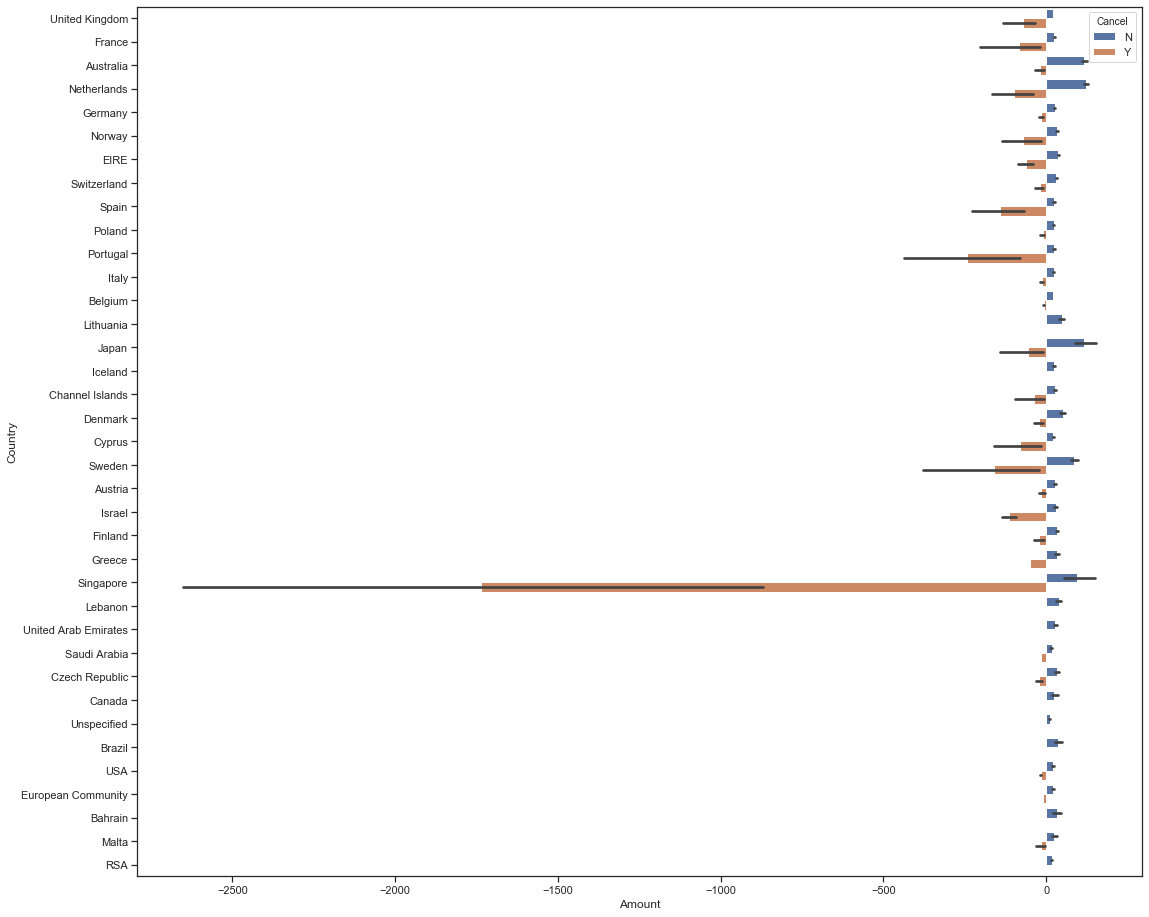

In [36]:
plt.figure(figsize=(18,16))
sns.set(style="ticks")
ax = sns.barplot(x="Amount",y="Country",data=dataset,hue="Cancel",)

In [37]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,N,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,N,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,N,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,N,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,N,20.34


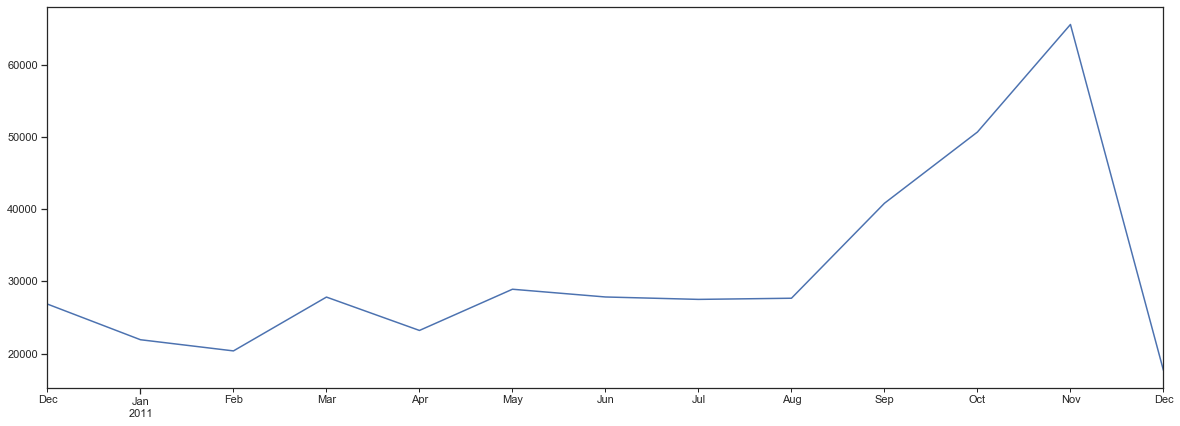

In [38]:
# Below graph shows the transaction rate over the period of given dataset
# From Dec- 2010 to Dec-2011 : where Nov - 2011 has captured the maximum transaction
dataset["InvoiceDate"].dt.to_period("M").value_counts(sort=False).plot(figsize=(20,7))
plt.show()

In [39]:
# Since we want first order date for a customer so we will make the customerID as the index so we can have first order date for each transaction
# per customer
dataset.set_index("CustomerID", inplace = True)
dataset["Cohort_Date"] = dataset.groupby(level=0)["InvoiceDate"].min().apply(lambda x: x.strftime("%Y-%m")) # "%Y-%m" used for year-month
dataset.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Cancel,Amount,Cohort_Date
CustomerID,,,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,N,15.30,2010-12
17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,N,20.34,2010-12
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,N,22.00,2010-12
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,N,20.34,2010-12
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,N,20.34,2010-12


In [40]:
dataset["Order_Period"] = dataset["InvoiceDate"].apply(lambda x: x.strftime("%Y-%m"))
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Cancel,Amount,Cohort_Date,Order_Period
CustomerID,,,,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,N,15.30,2010-12,2010-12
17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,N,20.34,2010-12,2010-12
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,N,22.00,2010-12,2010-12
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,N,20.34,2010-12,2010-12
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,N,20.34,2010-12,2010-12


In [41]:
# Restting index as we need the customerID 
dataset.reset_index(inplace=True)
dataset.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Cancel,Amount,Cohort_Date,Order_Period
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,N,15.30,2010-12,2010-12
1,17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,N,20.34,2010-12,2010-12
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,N,22.00,2010-12,2010-12
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,N,20.34,2010-12,2010-12
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,N,20.34,2010-12,2010-12


In [42]:
#Preparing cohorts i.e. Unique customers , total sales, total transaction per order period per cohort
group  = dataset.groupby(["Cohort_Date","Order_Period"])
cohorts = group.agg({"CustomerID": pd.Series.nunique,
         "Amount": np.sum,
          "InvoiceNo": pd.Series.nunique})
cohorts.head()

CustomerID     Amount  InvoiceNo
Cohort_Date Order_Period                                  
2010-12     2010-12            948.0  554604.02       1708
            2011-01            362.0  271616.52        689
            2011-02            317.0  230856.22        579
            2011-03            367.0  302509.39        753
            2011-04            341.0  200927.98        611

In [43]:

# Defining a fucntion to mark the index for cohort because we will use index instead of order period twice
def create_cohort_index(df):
    df["Cohort_Index"] = np.arange(len(df)) + 1
    return df

In [44]:
# After grouping we have two index "Cohort_Date" and "Order_Date", we are using level=0 so that calculation is done 
#with Cohort Date i.e. First Order date
cohorts = cohorts.groupby(level=0).apply(create_cohort_index)
cohorts.head(16)

CustomerID     Amount  InvoiceNo  Cohort_Index
Cohort_Date Order_Period                                                
2010-12     2010-12            948.0  554604.02       1708             1
            2011-01            362.0  271616.52        689             2
            2011-02            317.0  230856.22        579             3
            2011-03            367.0  302509.39        753             4
            2011-04            341.0  200927.98        611             5
            2011-05            376.0  321611.71        801             6
            2011-06            360.0  312894.36        736             7
            2011-07            336.0  303907.31        691             8
            2011-08            336.0  310882.67        661             9
            2011-09            374.0  466580.68        798            10
            2011-10            354.0  438835.91        762            11
            2011-11            474.0  510982.23       1135            12
            2011-12            260.0  182814.95        395            13
2011-01     2011-01            421.0  203457.86        547             1
            2011-02            101.0   56168.55        149             2
            2011-03            119.0   62264.88        182             3

In [45]:

cohorts.rename(columns={"CustomerID": "Total_Customers", "Amount": "Total_Sales","InvoiceNo": "Total_Order" },inplace= True)
cohorts.head(16)

Total_Customers  Total_Sales  Total_Order  \
Cohort_Date Order_Period                                              
2010-12     2010-12                 948.0    554604.02         1708   
            2011-01                 362.0    271616.52          689   
            2011-02                 317.0    230856.22          579   
            2011-03                 367.0    302509.39          753   
            2011-04                 341.0    200927.98          611   
            2011-05                 376.0    321611.71          801   
            2011-06                 360.0    312894.36          736   
            2011-07                 336.0    303907.31          691   
            2011-08                 336.0    310882.67          661   
            2011-09                 374.0    466580.68          798   
            2011-10                 354.0    438835.91          762   
            2011-11                 474.0    510982.23         1135   
            2011-12                 260.0    182814.95          395   
2011-01     2011-01                 421.0    203457.86          547   
            2011-02                 101.0     56168.55          149   
            2011-03                 119.0     62264.88          182   

                          Cohort_Index  
Cohort_Date Order_Period                
2010-12     2010-12                  1  
            2011-01                  2  
            2011-02                  3  
            2011-03                  4  
            2011-04                  5  
            2011-05                  6  
            2011-06                  7  
            2011-07                  8  
            2011-08                  9  
            2011-09                 10  
            2011-10                 11  
            2011-11                 12  
            2011-12                 13  
2011-01     2011-01                  1  
            2011-02                  2  
            2011-03                  3

In [46]:

# Changing the index to Cohort_Date & Cohort_index
cohorts.reset_index(inplace=True)
cohorts.set_index(["Cohort_Date","Cohort_Index"],inplace=True)

In [47]:

cohorts.head()

Order_Period  Total_Customers  Total_Sales  \
Cohort_Date Cohort_Index                                              
2010-12     1                 2010-12            948.0    554604.02   
            2                 2011-01            362.0    271616.52   
            3                 2011-02            317.0    230856.22   
            4                 2011-03            367.0    302509.39   
            5                 2011-04            341.0    200927.98   

                          Total_Order  
Cohort_Date Cohort_Index               
2010-12     1                    1708  
            2                     689  
            3                     579  
            4                     753  
            5                     611

In [48]:

# T gives us the transpose of the matrix which is a better viusal
# unstack is used to level the pivot and prepare customer retention matrix
cohorts["Total_Customers"].unstack(level=0).T

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Date,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# First column or first cohort index is considered as 100% new customer
group_size = cohorts["Total_Customers"].groupby(level=0).first()
group_size

Cohort_Date
2010-12    948.0
2011-01    421.0
2011-02    380.0
2011-03    440.0
2011-04    299.0
2011-05    279.0
2011-06    235.0
2011-07    191.0
2011-08    167.0
2011-09    298.0
2011-10    352.0
2011-11    321.0
2011-12     41.0
Name: Total_Customers, dtype: float64

In [50]:
# Customer retention Matrix - where we see how much customer client was able to retain over the cohort period in percentage
retention = cohorts["Total_Customers"].unstack(level=0).divide(group_size * 0.01)
retention.T

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Date,,,,,,,,,,,,,
2010-12,100.0,38.185654,33.438819,38.713080,35.970464,39.662447,37.974684,35.443038,35.443038,39.451477,37.341772,50.000000,27.42616
2011-01,100.0,23.990499,28.266033,24.228029,32.779097,29.928741,26.128266,25.653207,31.116390,34.679335,36.817102,14.964371,NaN
2011-02,100.0,24.736842,19.210526,27.894737,26.842105,24.736842,25.526316,28.157895,25.789474,31.315789,9.210526,NaN,NaN
2011-03,100.0,19.090909,25.454545,21.818182,23.181818,17.727273,26.363636,23.863636,28.863636,8.863636,NaN,NaN,NaN
2011-04,100.0,22.742475,22.073579,21.070234,20.735786,23.745819,23.076923,26.086957,8.361204,NaN,NaN,NaN,NaN
2011-05,100.0,23.655914,17.204301,17.204301,21.505376,24.372760,26.523297,10.394265,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,20.851064,18.723404,27.234043,24.680851,33.617021,10.212766,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,20.942408,20.418848,23.036649,27.225131,11.518325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,25.149701,25.149701,25.149701,13.772455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


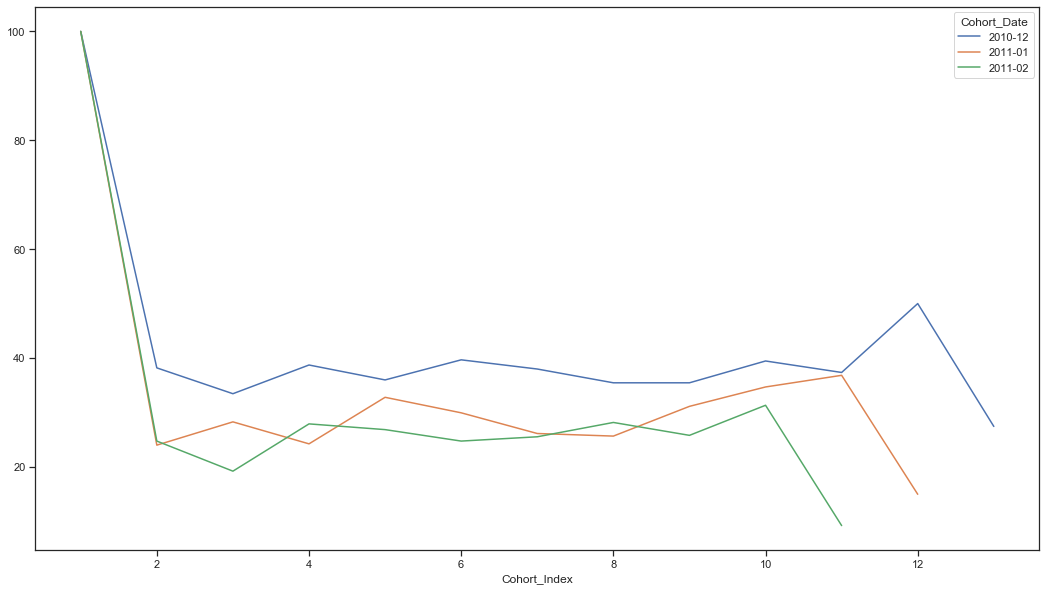

In [51]:
# Plotting customer retention for three cohort months
retention[["2010-12","2011-01","2011-02"]].plot(figsize=(18,10))

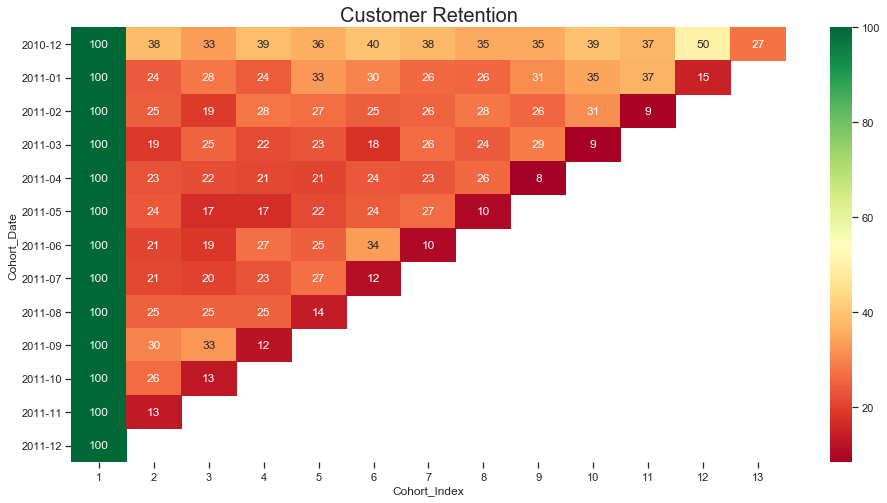

In [53]:
plt.figure(figsize=(16,8))
sns.heatmap(retention.T,annot=True,cmap="RdYlGn",fmt="0.0f")
plt.title("Customer Retention",size= 20)
plt.show()

Understanding the above heatmap
1. Each row indicates newly accquired customers and their retention throughout the period
2. Customer first purchase is considered as 100 to convert all the calculation in percentage
3. Eg. for "2011-01" only 24% of customers where retained in next month. 28% retention month following that and so on.....
5. "group_size" dataframe shows the actual number of customer that comprises 100%¶

Note That: Customer retention is a very useful metric to understand how many of the all customers are still active.Retention gives you the percentage of active customers compared to the total number of customers.

#### Project Task: Week 2
**Data Modeling :**

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

2. Calculate RFM metrics.

3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

b1. Combine three ratings to get a RFM segment (as strings).

b2. Get the RFM score by adding up the three ratings.

b3. Analyze the RFM segments by summarizing them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

In [55]:
# Max date transaction
now = dataset["InvoiceDate"].max()
now

Timestamp('2011-12-09 12:50:00')

In [56]:
# For calculating the recency of an transaction we use max date as the current date
import datetime as dt
now = dt.date(2011,12,9)
now

datetime.date(2011, 12, 9)

In [57]:
dataset["InvoiceDate"] = pd.DatetimeIndex(dataset["InvoiceDate"]).date

In [59]:
t = dataset.groupby("CustomerID")
RFMdata = t.agg({"InvoiceNo": 'count',
                 "Amount": 'sum',
                 "InvoiceDate": lambda x: now - x.max()})
RFMdata.head()

,InvoiceNo,Amount,InvoiceDate
CustomerID,,,
12346.0,2,0.00,325 days
12347.0,182,4310.00,2 days
12348.0,31,1797.24,75 days
12349.0,73,1757.55,18 days
12350.0,17,334.40,310 days


In [60]:
# Checking for distribution of our R F M
RFMdata.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,4372,93.0533,232.472,1,17,42,102,7983
Amount,4372,1898.46,8219.35,-4287.63,293.363,648.075,1611.72,279489
InvoiceDate,4372,91 days 13:56:55.553522,100 days 18:31:52.836716,0 days 00:00:00,16 days 00:00:00,50 days 00:00:00,143 days 00:00:00,373 days 00:00:00


In [61]:
#numeric_only false helps in getting quartiles for date time also
segment = RFMdata.quantile(q=[0.25,0.5,0.75],numeric_only=False)
segment = segment.to_dict()
segment

{'InvoiceNo': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'Amount': {0.25: 293.36250000000007,
  0.5: 648.0750000000002,
  0.75: 1611.7249999999995},
 'InvoiceDate': {0.25: Timedelta('16 days 00:00:00'),
  0.5: Timedelta('50 days 00:00:00'),
  0.75: Timedelta('143 days 00:00:00')}}

In [62]:
segment["Amount"][0.25]

293.36250000000007

In [63]:
# creating R_segment where recent order falls in first quartile will be give 1 priorty second quartile will be given 2 priorty and so on..
RFMdata["R_segment"] = RFMdata["InvoiceDate"].apply(lambda x: 1 if (x < segment["InvoiceDate"][0.25]) 
                                                     else 2 if (x > segment["InvoiceDate"][0.25] and x < segment["InvoiceDate"][0.5]) 
                                                     else 3 if (x > segment["InvoiceDate"][0.5] and x < segment["InvoiceDate"][0.75]) 
                                                     else 4)

In [64]:
RFMdata.head(12)

,InvoiceNo,Amount,InvoiceDate,R_segment
CustomerID,,,,
12346.0,2,0.00,325 days,4
12347.0,182,4310.00,2 days,1
12348.0,31,1797.24,75 days,3
12349.0,73,1757.55,18 days,2
12350.0,17,334.40,310 days,4
12352.0,95,1545.41,36 days,2
12353.0,4,89.00,204 days,4
12354.0,58,1079.40,232 days,4
12355.0,13,459.40,214 days,4


In [65]:
# creating F_segment where recent order falls in first quartile will be give 4 priorty second quartile will be given 3 priorty and so on..
RFMdata["F_segment"] = RFMdata["InvoiceNo"].apply(lambda x: 4 if (x < segment["InvoiceNo"][0.25]) 
                                                     else 3 if (x > segment["InvoiceNo"][0.25] and x < segment["InvoiceNo"][0.5]) 
                                                     else 2 if (x > segment["InvoiceNo"][0.5] and x < segment["InvoiceNo"][0.75]) 
                                                     else 1)

In [66]:

# creating M_segment where recent order falls in first quartile will be give 4 priorty second quartile will be given 3 priorty and so on..
RFMdata["M_segment"] = RFMdata["Amount"].apply(lambda x: 4 if (x < segment["Amount"][0.25]) 
                                                     else 3 if (x > segment["Amount"][0.25] and x < segment["Amount"][0.5]) 
                                                     else 2 if (x > segment["Amount"][0.5] and x < segment["Amount"][0.75]) 
                                                     else 1)

In [67]:

RFMdata.rename(columns={"InvoiceDate": "Recency", "Amount": "Monetary","InvoiceNo": "Frequency" },inplace= True)
RFMdata.head()

,Frequency,Monetary,Recency,R_segment,F_segment,M_segment
CustomerID,,,,,,
12346.0,2,0.00,325 days,4,4,4
12347.0,182,4310.00,2 days,1,1,1
12348.0,31,1797.24,75 days,3,3,1
12349.0,73,1757.55,18 days,2,2,1
12350.0,17,334.40,310 days,4,1,3


In [68]:
# Combining RFM and using this RFM as a metric
RFMdata["RFM"] = RFMdata.R_segment.map(str) + RFMdata.F_segment.map(str) + RFMdata.M_segment.map(str)

In [69]:
RFMdata.head()

,Frequency,Monetary,Recency,R_segment,F_segment,M_segment,RFM
CustomerID,,,,,,,
12346.0,2,0.00,325 days,4,4,4,444
12347.0,182,4310.00,2 days,1,1,1,111
12348.0,31,1797.24,75 days,3,3,1,331
12349.0,73,1757.55,18 days,2,2,1,221
12350.0,17,334.40,310 days,4,1,3,413


In [70]:
RFMdata["RFM"] = RFMdata["RFM"].astype(int)

In [71]:
# Count of best customers & worst customers
RFMdata[RFMdata["RFM"] == 111].shape,RFMdata[RFMdata["RFM"] == 444].shape

((443, 7), (392, 7))

In [109]:
RFMdata["RFM_Score"] = RFMdata[["R_segment","F_segment","M_segment"]].sum(axis=1)
RFMdata.head()

,Frequency,Monetary,Recency,R_segment,F_segment,M_segment,RFM,Segment,RFM_Score
CustomerID,,,,,,,,,
12346.0,2,0.00,325 days,4,4,4,444,others customer or Mvp viable person,12
12347.0,182,4310.00,2 days,1,1,1,111,others customer or Mvp viable person,3
12348.0,31,1797.24,75 days,3,3,1,331,others customer or Mvp viable person,7
12349.0,73,1757.55,18 days,2,2,1,221,others customer or Mvp viable person,5
12350.0,17,334.40,310 days,4,1,3,413,others customer or Mvp viable person,8


In [110]:
# Based on RFM score categorising the cutsomer membership level in 4 groups
Customer_rank = ["Platinum","Gold","Silver","Bronze"]
RFMdata["Customer_Value"] = pd.qcut(RFMdata.RFM_Score,q= 4, labels=Customer_rank)
RFMdata.head()

,Frequency,Monetary,Recency,R_segment,F_segment,M_segment,RFM,Segment,RFM_Score,Customer_Value
CustomerID,,,,,,,,,,
12346.0,2,0.00,325 days,4,4,4,444,others customer or Mvp viable person,12,Bronze
12347.0,182,4310.00,2 days,1,1,1,111,others customer or Mvp viable person,3,Platinum
12348.0,31,1797.24,75 days,3,3,1,331,others customer or Mvp viable person,7,Gold
12349.0,73,1757.55,18 days,2,2,1,221,others customer or Mvp viable person,5,Platinum
12350.0,17,334.40,310 days,4,1,3,413,others customer or Mvp viable person,8,Gold


In [111]:
RFMdata.loc[RFMdata["RFM"] == 111].head()

,Frequency,Monetary,Recency,R_segment,F_segment,M_segment,RFM,Segment,RFM_Score,Customer_Value
CustomerID,,,,,,,,,,
12347.0,182,4310.00,2 days,1,1,1,111,others customer or Mvp viable person,3,Platinum
12359.0,254,6245.53,7 days,1,1,1,111,others customer or Mvp viable person,3,Platinum
12362.0,274,5154.58,3 days,1,1,1,111,others customer or Mvp viable person,3,Platinum
12395.0,159,2998.28,15 days,1,1,1,111,others customer or Mvp viable person,3,Platinum
12417.0,198,3578.80,3 days,1,1,1,111,others customer or Mvp viable person,3,Platinum


In [112]:
graph = RFMdata
graph.reset_index(inplace=True)

In [113]:

graph.head()

,CustomerID,Frequency,Monetary,Recency,R_segment,F_segment,M_segment,RFM,Segment,RFM_Score,Customer_Value
0,12346.0,2,0.00,325 days,4,4,4,444,others customer or Mvp viable person,12,Bronze
1,12347.0,182,4310.00,2 days,1,1,1,111,others customer or Mvp viable person,3,Platinum
2,12348.0,31,1797.24,75 days,3,3,1,331,others customer or Mvp viable person,7,Gold
3,12349.0,73,1757.55,18 days,2,2,1,221,others customer or Mvp viable person,5,Platinum
4,12350.0,17,334.40,310 days,4,1,3,413,others customer or Mvp viable person,8,Gold


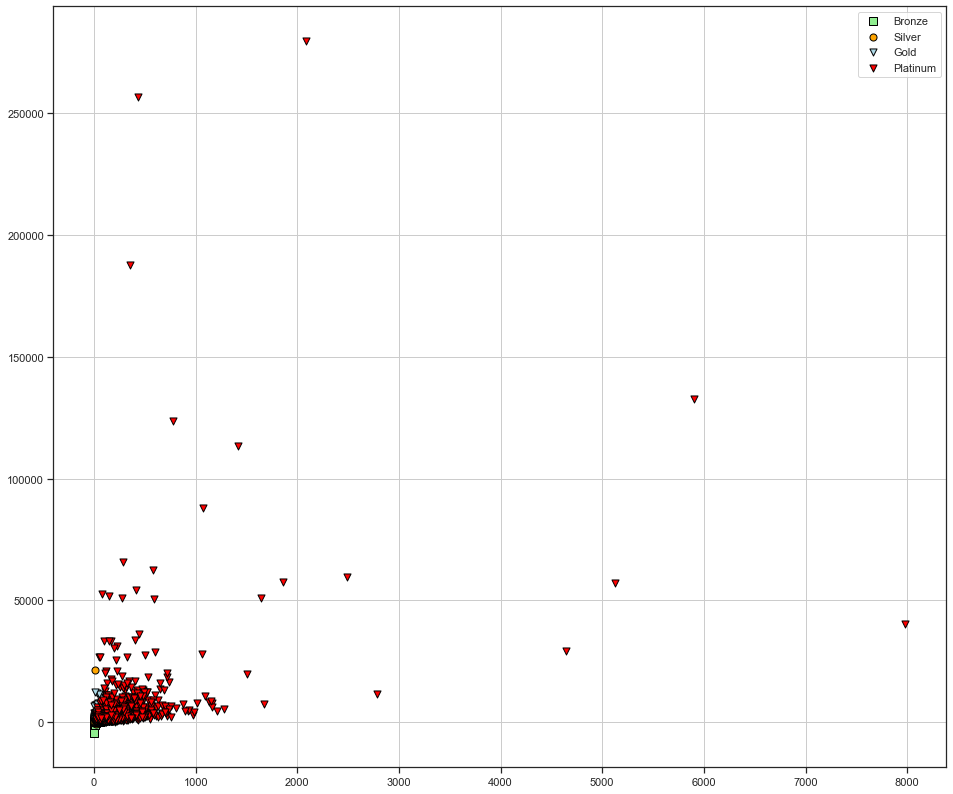

In [114]:
X0 = graph.loc[graph["Customer_Value"] == "Bronze"]["Frequency"]
Y0 = graph.loc[graph["Customer_Value"] == "Bronze"]["Monetary"]

X2 = graph.loc[graph["Customer_Value"] == "Silver"]["Frequency"]
Y2 = graph.loc[graph["Customer_Value"] == "Silver"]["Monetary"]

X3 = graph.loc[graph["Customer_Value"] == "Gold"]["Frequency"]
Y3 = graph.loc[graph["Customer_Value"] == "Gold"]["Monetary"]

X4 = graph.loc[graph["Customer_Value"] == "Platinum"]["Frequency"]
Y4 = graph.loc[graph["Customer_Value"] == "Platinum"]["Monetary"]

plt.figure(figsize=(16,14))
# plot the 3 clusters
plt.scatter(
    X0, Y0,
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Bronze'
)

plt.scatter(
    X2, Y2,
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='Silver'
)

plt.scatter(
    X3, Y3,
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='Gold'
)

plt.scatter(
    X4, Y4,
    s=50, c='red',
    marker='v', edgecolor='black',
    label='Platinum'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#### Project Task: Week 3
**Data Modeling :**

1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

b. Decide the optimum number of clusters to be formed.

c. Analyze these clusters and comment on the results.

In [117]:
# Preparing data for KMeans Algorithim
X = graph[["Frequency","Monetary","Recency"]]
X["Recency"] = (X["Recency"] / np.timedelta64(1, 'D')).astype(int) 
X.head()

C:\Users\KPC\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Frequency,Monetary,Recency
0,2,0.00,325
1,182,4310.00,2
2,31,1797.24,75
3,73,1757.55,18
4,17,334.40,310


In [119]:
#Instanciating the Scaler
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [120]:
# Since the input variables are not in same scale so Kmeans clustering won't be effective as it is distance based - we need to scale
X1 = SS.fit_transform(X)

In [122]:
#Performing KMeans with 4 cluster and will observe the error
from sklearn.cluster import KMeans # Perfoaming Customer segmentation
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X1)

In [123]:
y_cluster = pd.DataFrame(y_km, columns=["Cluster"])

In [124]:

y_cluster["Cluster"].value_counts()

2    2998
3    1070
1     293
0      11
Name: Cluster, dtype: int64

In [125]:
graph.Customer_Value.value_counts()

Gold        1367
Platinum    1254
Silver       979
Bronze       772
Name: Customer_Value, dtype: int64

In [126]:
km.inertia_ # Indicates within sum of square of distance of sample points with its cluster centroid

4429.486617918336

`As we see above there are many sample points which are not assigned to correct cluster
We will perform Elbow method to identify the optimal number of cluster for this dataset`

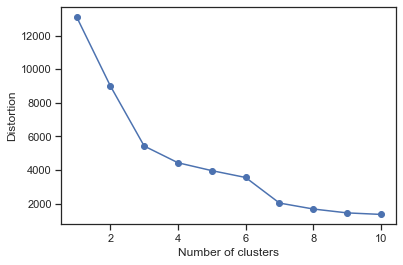

In [128]:
# Calculating error (inertia__) and plotting it against number of clusters

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        random_state=0
    )
    km.fit(X1)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

The above Graph shows that 7 cluster is an optimal number of cluster

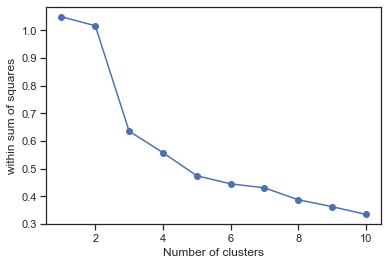

In [130]:
from scipy.spatial import distance # For calculating spatial distance of sample points with scentroids
# Calculating error (distance between points & cluster centroid) and plotting it against number of clusters

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X1)
    distortions.append(sum(np.min(distance.cdist(X1,km.cluster_centers_,'euclidean'),axis=1))/X1.shape[0])

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('within sum of squares')
plt.show()

The above Graph shows that 9 cluster is also an optimal number of cluster
we will leave upto business how many cluster they want
We will use only 7 cluster as it better to have less number of cluster and prepare our final model

In [131]:
Km = KMeans(n_clusters=7,init="random",random_state=0)
Y_Km = Km.fit_predict(X1)

In [132]:
Y_cluster = pd.DataFrame(Y_Km, columns=["Cluster"])

In [133]:
graph.shape,Y_cluster.shape

((4372, 11), (4372, 1))

In [134]:
Output = pd.concat([graph,Y_cluster],axis=1)
Output.head()

,CustomerID,Frequency,Monetary,Recency,R_segment,F_segment,M_segment,RFM,Segment,RFM_Score,Customer_Value,Cluster
0,12346.0,2,0.00,325 days,4,4,4,444,others customer or Mvp viable person,12,Bronze,0
1,12347.0,182,4310.00,2 days,1,1,1,111,others customer or Mvp viable person,3,Platinum,5
2,12348.0,31,1797.24,75 days,3,3,1,331,others customer or Mvp viable person,7,Gold,2
3,12349.0,73,1757.55,18 days,2,2,1,221,others customer or Mvp viable person,5,Platinum,2
4,12350.0,17,334.40,310 days,4,1,3,413,others customer or Mvp viable person,8,Gold,0


In [135]:
Output.shape

(4372, 12)

In [136]:
Output.Cluster.value_counts()

2    2512
6     773
0     614
5     429
3      35
1       5
4       4
Name: Cluster, dtype: int64

In [137]:
Output.Customer_Value.value_counts()

Gold        1367
Platinum    1254
Silver       979
Bronze       772
Name: Customer_Value, dtype: int64

#### Project Task: Week 4
Data Reporting:

1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

c. Bar graph to show the count of orders vs. hours throughout the day

d. Plot the distribution of RFM values using histogram and frequency charts

e. Visualize to compare the RFM values of the clusters using heatmap

### Screenshot 1 - Task 1(a) - Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures



In [143]:
from PIL import Image as PILImage
import base64, io, IPython
def image_import(image_path):
    image = PILImage.open(image_path)
    output = io.BytesIO()
    image.save(output, format='PNG')
    encoded_string = base64.b64encode(output.getvalue()).decode()
    html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
    return IPython.display.HTML(html)


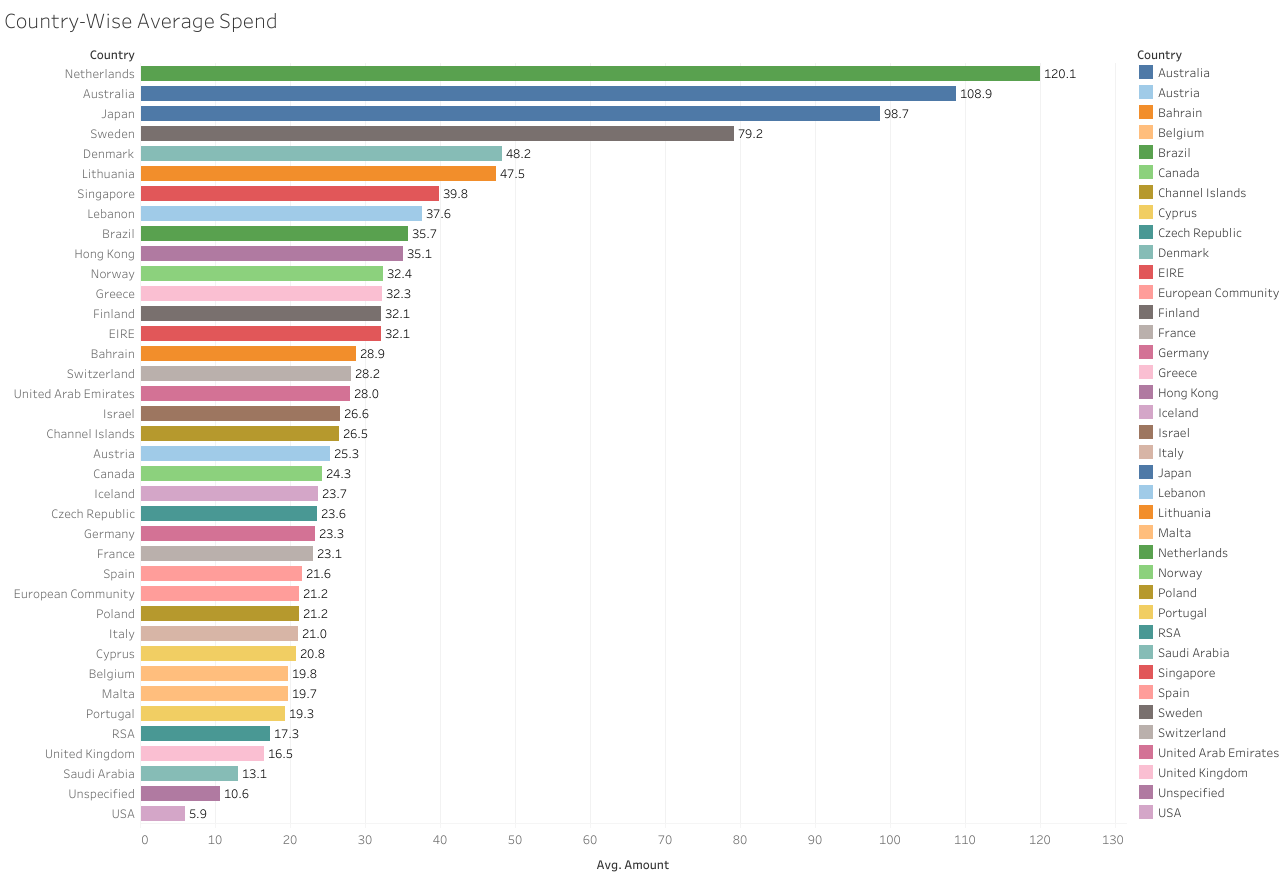

In [144]:
image_import("Country-Wise Average Spend.png")

### Screenshot 2 - Task 1(b) - Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold


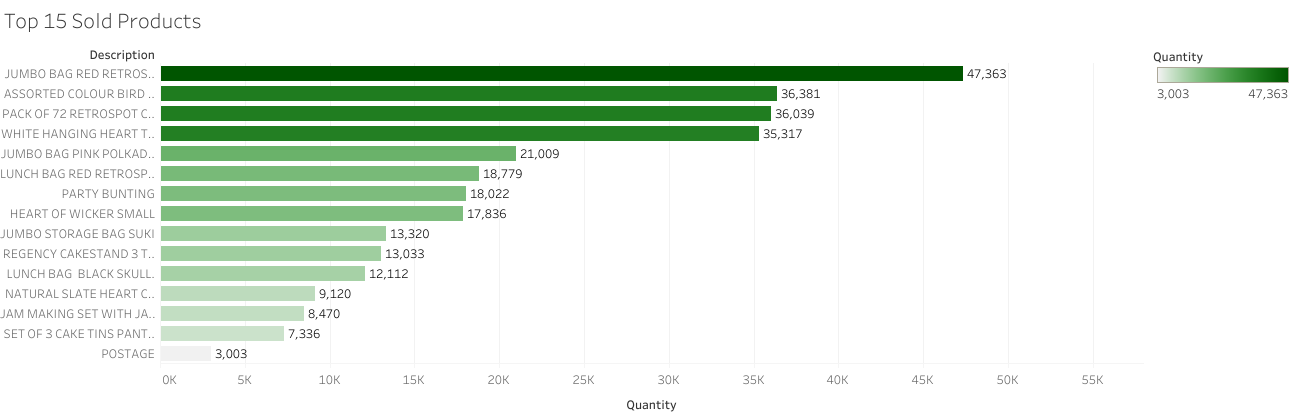

In [145]:
image_import("Top 15 Sold Products.png")

### Screenshot 3 - Task 1(c) - Bar graph to show the count of orders vs. hours throughout the day


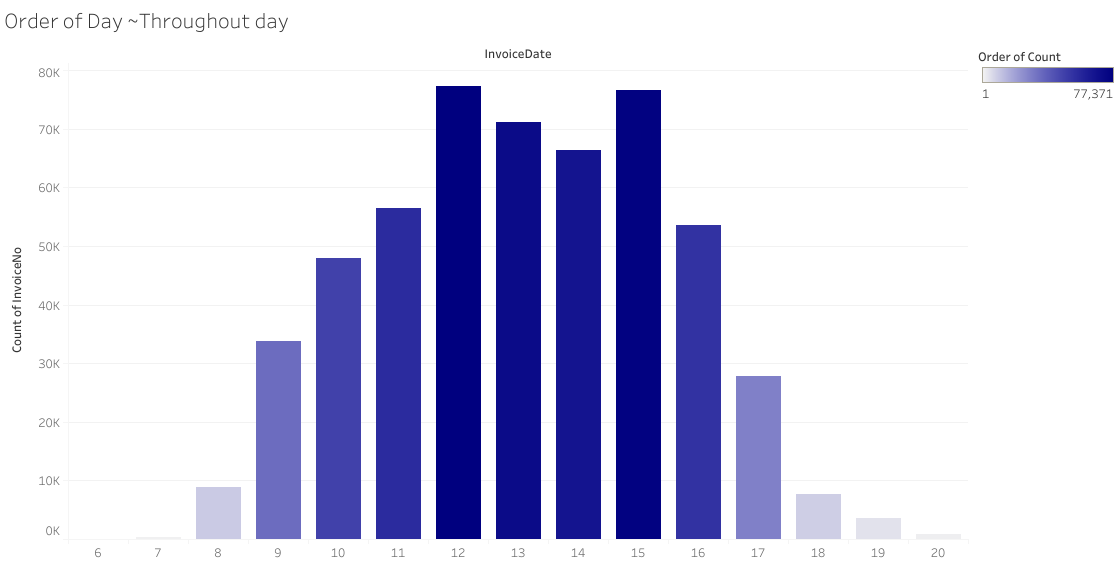

In [146]:
image_import("Order of Day _Throughout day.png")

### Screenshot 4 - Task 1(d) - Plot the distribution of RFM values using Scatter Plot 


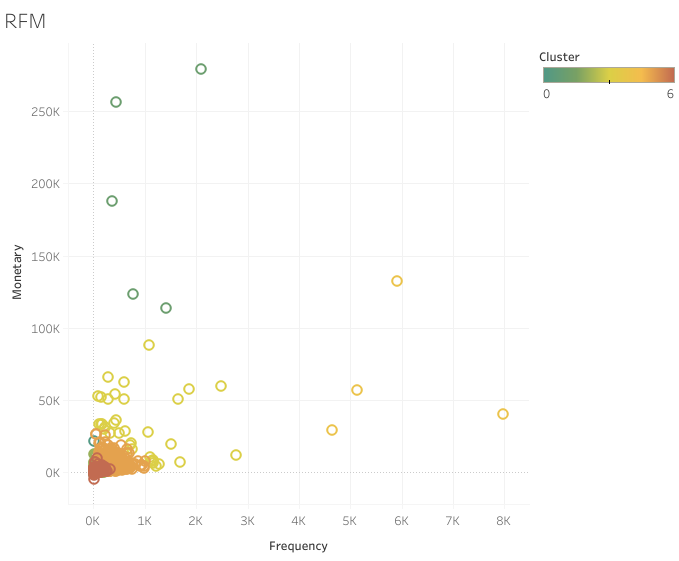

In [147]:
image_import("RFM.png")

### Screenshot 4 - Task 1(e) - Visualize to compare the RFM values of the clusters using heatmap


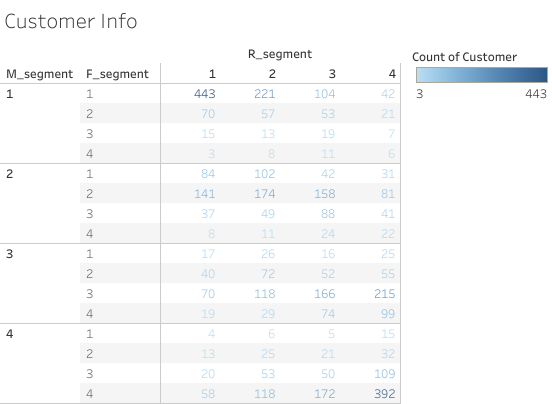

In [149]:
image_import("Heatmap.png")


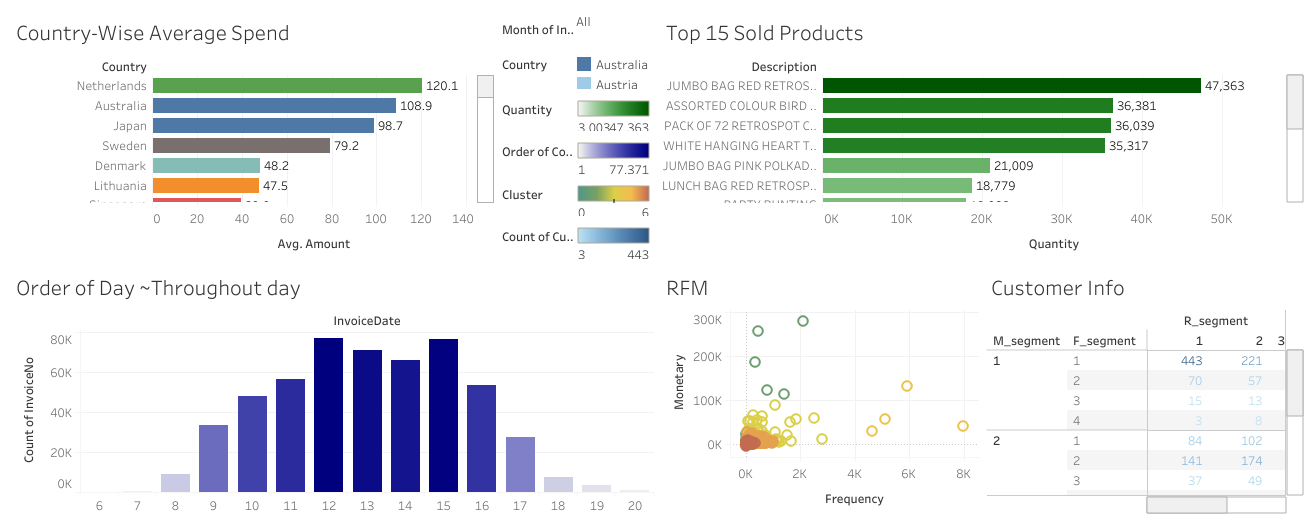

In [150]:
# Dashboard
image_import("Dashboard 1.png")

Please click _**[here](https://public.tableau.com/profile/kishore.g.t#!/vizhome/Book1RET/Dashboard1 "Tableau Dashboard")**_ for the **Live Tableau Dashboard**.

### Conclusion
We have identifed the way to clusters our customers with optimal cluster being 7 where error did not decrease significantly

Based on Mean cost spend by the customer promotion or membership can be decided

Based on Mean frequency of customer promotion date and time can be decided as most of the sales happen during day time 12 PM - 3 PM

Top 15 sold products will help in inventory management

Customer retention heatmap will help in schedule the promotion event date

Thank you !!!